In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('ggplot')


In [18]:
#load the data
df = pd.read_csv("../Data/nba-stats-first2seasons.csv")

In [19]:
df.shape

(1325, 75)

In [20]:
df = df.dropna().reset_index(drop=True)

In [21]:
df.shape

(1065, 75)

In [22]:
df.columns

Index(['Season', 'Age', 'Tm', 'Lg', 'Player', 'G', 'GS', 'MP', 'FG', 'FGA',
       '2P', '2PA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'],
      dtype='object')

In [23]:
df.describe()

,Age,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,...,BLK_diff,BLK_avg,TOV_diff,TOV_avg,PF_diff,PF_avg,PTS_diff,PTS_avg,all_star,rising_star
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,...,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,22.063850,49.143662,15.518310,16.335775,2.243192,5.261315,1.825822,3.970329,0.418779,1.289484,...,0.000939,0.312207,0.035117,1.037089,0.023474,1.654460,0.063286,6.585540,0.104225,0.172770
std,2.076465,23.770421,22.538686,8.107771,1.474098,3.202951,1.333539,2.734983,0.448854,1.221026,...,0.222298,0.351081,0.533173,0.643570,0.675910,0.730557,3.521872,4.185644,0.305696,0.378226
min,18.000000,2.000000,0.000000,2.800000,0.000000,0.700000,0.000000,0.300000,0.000000,0.000000,...,-1.100000,0.000000,-3.000000,0.050000,-2.300000,0.000000,-13.500000,0.350000,0.000000,0.000000
25%,21.000000,29.000000,0.000000,10.000000,1.200000,3.000000,0.900000,2.000000,0.100000,0.300000,...,-0.100000,0.100000,-0.300000,0.600000,-0.400000,1.100000,-2.000000,3.500000,0.000000,0.000000
50%,22.000000,51.000000,4.000000,15.300000,1.800000,4.400000,1.400000,3.200000,0.300000,1.000000,...,0.000000,0.200000,0.000000,0.900000,0.000000,1.600000,0.000000,5.500000,0.000000,0.000000
75%,23.000000,72.000000,22.000000,21.400000,3.000000,6.800000,2.400000,5.200000,0.600000,2.000000,...,0.100000,0.400000,0.400000,1.300000,0.400000,2.150000,2.000000,8.450000,0.000000,0.000000
max,35.000000,82.000000,82.000000,39.700000,8.600000,18.900000,8.600000,16.500000,2.500000,7.100000,...,1.500000,2.500000,2.300000,4.300000,2.300000,4.150000,12.000000,24.950000,1.000000,1.000000


 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '2P%', '3P%', 'eFG%', 'FT%',
       'TS%', 'Age_diff', 'Age_avg', 'G_diff', 'G_avg', 'GS_diff', 'GS_avg',
       'MP_diff', 'MP_avg', 'FG_diff', 'FG_avg', 'FGA_diff', 'FGA_avg',
       '2P_diff', '2P_avg', '2PA_diff', '2PA_avg', '3P_diff', '3P_avg',
       '3PA_diff', '3PA_avg', 'FT_diff', 'FT_avg', 'FTA_diff', 'FTA_avg',
       'ORB_diff', 'ORB_avg', 'DRB_diff', 'DRB_avg', 'TRB_diff', 'TRB_avg',
       'AST_diff', 'AST_avg', 'STL_diff', 'STL_avg', 'BLK_diff', 'BLK_avg',
       'TOV_diff', 'TOV_avg', 'PF_diff', 'PF_avg', 'PTS_diff', 'PTS_avg',
       'all_star', 'rising_star'

In [ ]:
##

In [ ]:
##

In [ ]:
##

In [57]:
df['all_star_labels'] = df['all_star'].apply(lambda x: 'All Star' if x == 1 else 'Not an All Star')

In [25]:
print(df['all_star'].value_counts())

0    954
1    111
Name: all_star, dtype: int64


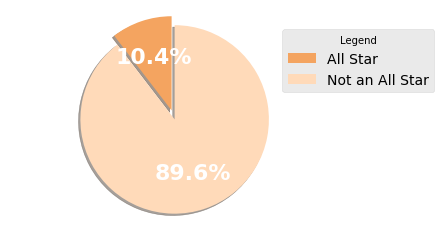

In [28]:
# plotting original data
labels = 'All Star', 'Not an All Star'
btc_1 = [sum(df.all_star), (df.all_star == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['sandybrown', 'peachpuff']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()


## G (Games Played)

In [61]:
df.G.describe()

count    1065.000000
mean       49.143662
std        23.770421
min         2.000000
25%        29.000000
50%        51.000000
75%        72.000000
max        82.000000
Name: G, dtype: float64

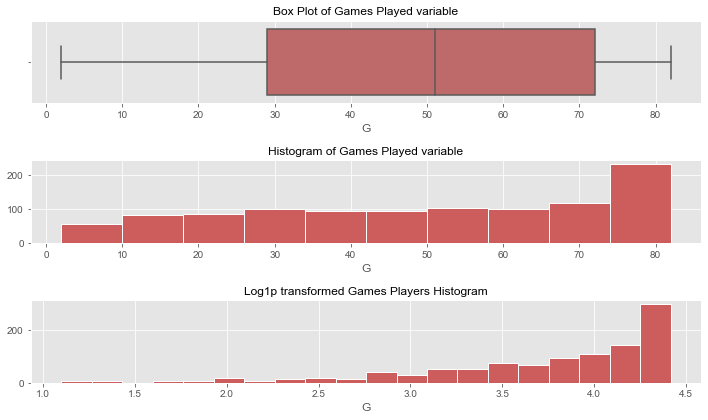

In [32]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.G, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Games Played variable")
sns.distplot(a=df.G, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Games Played variable")
sns.distplot(a=np.log1p(df.G), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Games Players Histogram")
f.tight_layout()

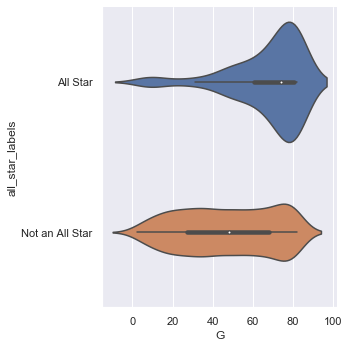

In [59]:

sns.catplot(x="G", y="all_star_labels",
            kind="violin", data=df);

In [40]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['G'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['G']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.254
Pearsons correlation between belongs_to_collection and revenue: 0.201


## Games Started (GS)

In [62]:
df.GS.describe()

count    1065.000000
mean       15.518310
std        22.538686
min         0.000000
25%         0.000000
50%         4.000000
75%        22.000000
max        82.000000
Name: GS, dtype: float64

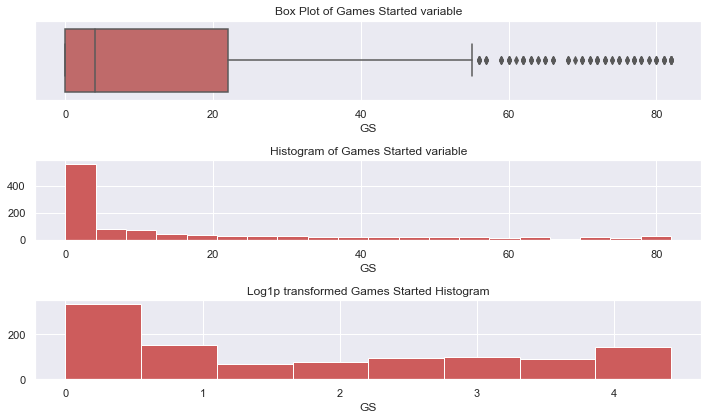

In [63]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.GS, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Games Started variable")
sns.distplot(a=df.GS, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Games Started variable")
sns.distplot(a=np.log1p(df.GS), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Games Started Histogram")
f.tight_layout()

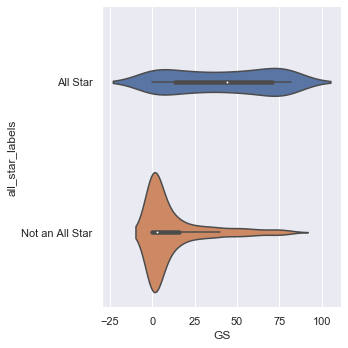

In [64]:

sns.catplot(x="GS", y="all_star_labels",
            kind="violin", data=df);

In [66]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['GS'], df['all_star'])
print('Pearsons correlation between games started and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['GS']), df['all_star'])
print('Pearsons correlation between log of games started and revenue: %.3f' % corr)

Pearsons correlation between games started and revenue: 0.388
Pearsons correlation between log of games started and revenue: 0.303


## Minutes Played

In [67]:
df.MP.describe()

count    1065.000000
mean       16.335775
std         8.107771
min         2.800000
25%        10.000000
50%        15.300000
75%        21.400000
max        39.700000
Name: MP, dtype: float64

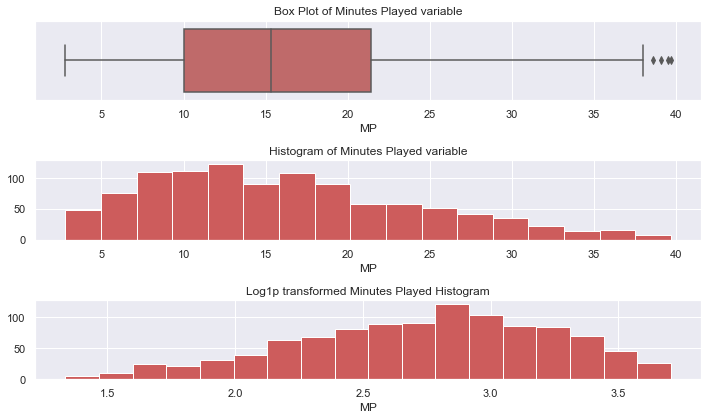

In [68]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.MP, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Minutes Played variable")
sns.distplot(a=df.MP, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Minutes Played variable")
sns.distplot(a=np.log1p(df.MP), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Minutes Played Histogram")
f.tight_layout()

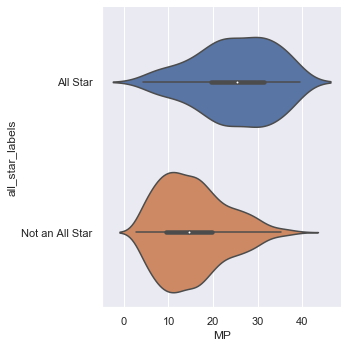

In [69]:
sns.catplot(x="MP", y="all_star_labels",
            kind="violin", data=df);

In [70]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['MP'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['MP']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.360
Pearsons correlation between belongs_to_collection and revenue: 0.303


## Field Goals Made (FG)

In [71]:
df.FG.describe()

count    1065.000000
mean        2.243192
std         1.474098
min         0.000000
25%         1.200000
50%         1.800000
75%         3.000000
max         8.600000
Name: FG, dtype: float64

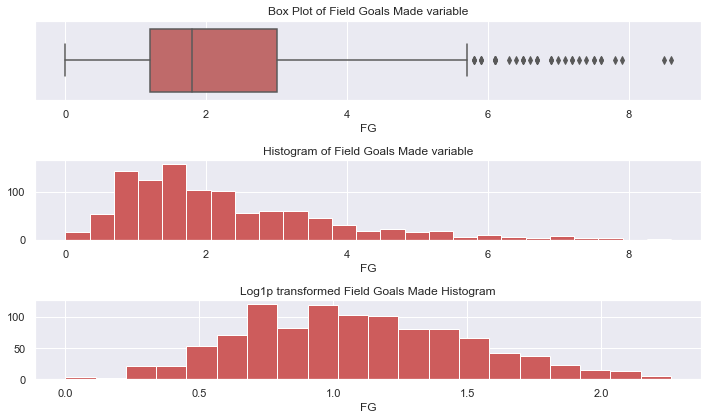

In [72]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.FG, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Field Goals Made variable")
sns.distplot(a=df.FG, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Field Goals Made variable")
sns.distplot(a=np.log1p(df.FG), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Field Goals Made Histogram")
f.tight_layout()

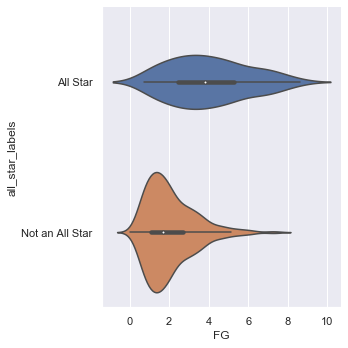

In [73]:
sns.catplot(x="FG", y="all_star_labels",
            kind="violin", data=df);

In [74]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FG'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FG']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.408
Pearsons correlation between belongs_to_collection and revenue: 0.358


## Field Goals Attempted (FGA)

In [75]:
df.FGA.describe()

count    1065.000000
mean        5.261315
std         3.202951
min         0.700000
25%         3.000000
50%         4.400000
75%         6.800000
max        18.900000
Name: FGA, dtype: float64

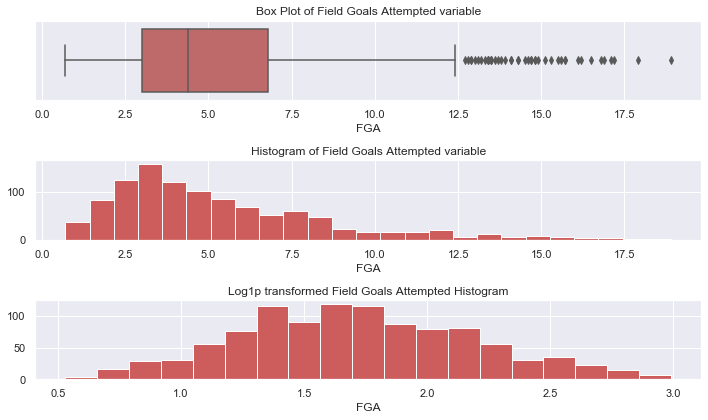

In [76]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df.FGA, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Field Goals Attempted variable")
sns.distplot(a=df.FGA, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Field Goals Attempted variable")
sns.distplot(a=np.log1p(df.FGA), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Field Goals Attempted Histogram")
f.tight_layout()

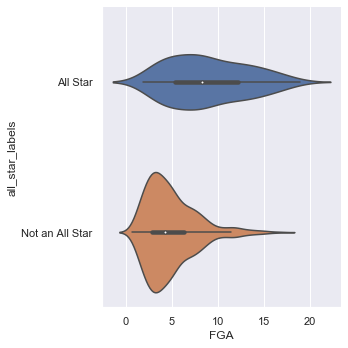

In [77]:
sns.catplot(x="FGA", y="all_star_labels",
            kind="violin", data=df);

In [78]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['FGA'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['FGA']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.385
Pearsons correlation between belongs_to_collection and revenue: 0.336


## Two pointers Made (2P)

In [80]:
df['2P'].describe()

count    1065.000000
mean        1.825822
std         1.333539
min         0.000000
25%         0.900000
50%         1.400000
75%         2.400000
max         8.600000
Name: 2P, dtype: float64

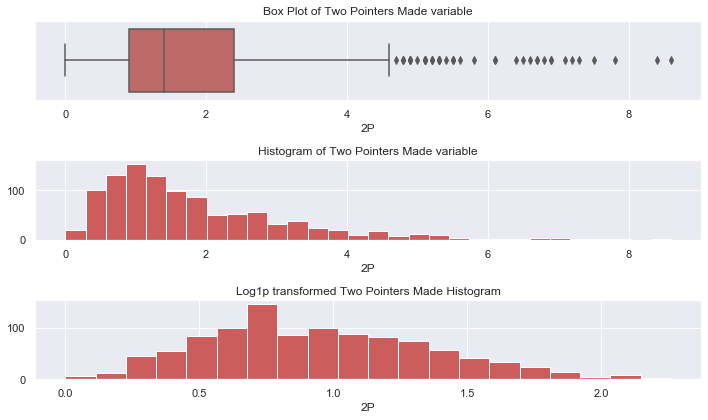

In [81]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=df['2P'], ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of Two Pointers Made variable")
sns.distplot(a=df['2P'], kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of Two Pointers Made variable")
sns.distplot(a=np.log1p(df['2P']), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed Two Pointers Made Histogram")
f.tight_layout()

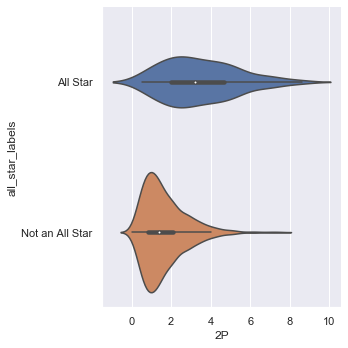

In [82]:
sns.catplot(x="2P", y="all_star_labels",
            kind="violin", data=df);

In [83]:
#analysis of correlation and create log feature
corr, _ = pearsonr(df['2P'], df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(df['2P']), df['all_star'])
print('Pearsons correlation between belongs_to_collection and revenue: %.3f' % corr)

Pearsons correlation between belongs_to_collection and revenue: 0.420
Pearsons correlation between belongs_to_collection and revenue: 0.373


## Two Pointers Attempted (2PA)

## Three Pointers Made (3P)

## Thee Pointers Attempted (3PA)

## Free Throws Made (FT)

## Free Throws Attempted (FTA)

## Offensive Rebounds (ORB)

## Defensive Rebounds (DRB)

## Total Rebounds (TRB)

In [ ]:
## 